# Work for Chapter 4 
## Libraries included:
The libraries included in this program are: 
- sys, time, tqdm, random
- numpy as np
- pandas as pd
- matplotlib.pyplot as plt
- seaborn as sns

## Functions included:
The functions included in this program are:
- Find_Max_Crossing_Subarray(A, low, mid, high)
- Find_Max_Sub(A, low, high) $\Theta(n\log(n))$
- Brute_Max_Sub(A, low, high) $\Theta(n^2)$
- Linear_Max_Sub(A, low, high) $\Theta(n)$
- sq_mat_mult(A,B) $\Theta(n^3)$
- rec_sq_mult(A,B) $\Theta(n^3)$
- strassen(A,B) $\Theta(n^{\log(7)})$
- strassen2(A,B, leaf) $\Theta(n^{\log(7)})$


In [116]:
# Load relevant libraries and algorithms
%time %run /Users/Everett/Documents/Code/Python/Python/chp4_algorithms.py

Import of Chapter 4 algorithms Complete
CPU times: user 18.9 ms, sys: 4.58 ms, total: 23.5 ms
Wall time: 27.5 ms


## Exercise 4.1-1
What does Find_Max_Sub return for array $A$ of all negative values?

This function will return the index pair for the value of least magnitude.  

In [2]:
# Example:
A = [-1, -2, -5, -3, -4]
print Find_Max_Sub(A, 0, len(A)-1)
B = [-4, -2, -3, -5]
print Find_Max_Sub(B, 0, len(B)-1)

(0, 0, -1)
(1, 1, -2)


## Exercise 4.1-2 and 4.1-3
Implement Brute-force method of solving the maximum-subarray problem.  
Make sure the implementation runs in $\Theta(n^2)$ time.  

In [8]:
# Plot times of Brute Force vs Find_Max_Sub

# Number of trials
rep = 100

sizes = []
for i in xrange(0, rep):
    sizes.append(i+1)

Brute_times, Find_times = [], []

for i in tqdm.trange(0, rep):
    B_avg = []
    F_avg = []
    for j in xrange(0,10):
        # Generate list of floats, both negative and positive
        A = np.random.uniform(-sizes[i], sizes[i], sizes[i])
        start = time.clock()
        Brute_Max_Sub(A, 0, len(A)-1)
        B_avg.append(time.clock() - start)
        start = time.clock()
        Find_Max_Sub(A, 0, len(A) - 1)
        F_avg.append(time.clock() - start)
    Brute_times.append(np.mean(B_avg))
    Find_times.append(np.mean(F_avg))
    

100%|██████████| 100/100 [00:08<00:00,  3.49it/s]


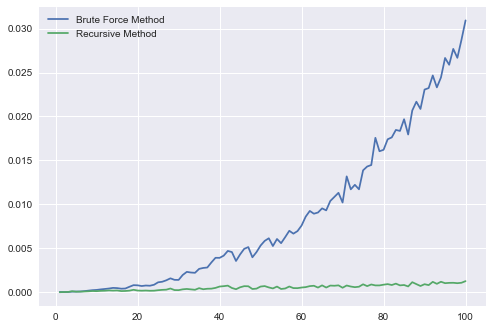

In [9]:
plt.plot(sizes, Brute_times, label="Brute Force Method")
plt.plot(sizes, Find_times, label="Recursive Method")
plt.legend()
plt.show()

In [10]:
# Plot times of Find_Max_Sub to verify nlog(n) behavior

# Number of trials
rep = 1000

sizes = []
for i in xrange(0, rep):
    sizes.append(i+1)

Find_times = []

for i in tqdm.trange(0, rep):
    F_avg = []
    for j in xrange(0,10):
        # Generate list of floats, both negative and positive
        A = np.random.uniform(-sizes[i], sizes[i], sizes[i])
        start = time.clock()
        Find_Max_Sub(A, 0, len(A) - 1)
        F_avg.append(time.clock() - start)
    Find_times.append(np.mean(F_avg))

100%|██████████| 1000/1000 [00:48<00:00, 20.50it/s]


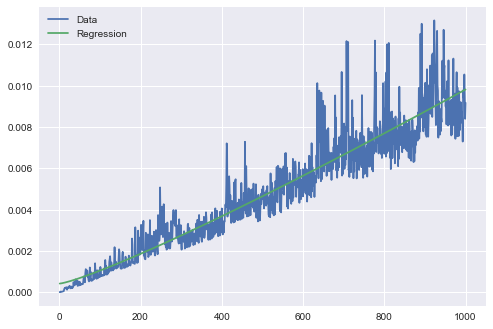

In [11]:
plt.plot(sizes, Find_times, label="Data")

a, b = np.polyfit(np.log(sizes)*sizes, Find_times, 1)
plt.plot(sizes, map(lambda x: a*np.log(x)*x + b, sizes), label="Regression")

plt.legend()
plt.show()

## Exercise 4.1-5
Implement Linear_Max_Sub, an algorithm that finds the maximal
sub-array in linear time.  

In [29]:
# Gather times for Find_Max_Sub and Linear_Max_Sub

rep = 1000

sizes = []
for i in xrange(0, rep):
    sizes.append(i*10+1)

L_times = []
F_times = []

for i in tqdm.trange(rep):
    A = np.random.uniform(-sizes[i], sizes[i], sizes[i])
    start = time.clock()
    a = Linear_Max_Sub(A, 0, len(A)-1)
    L_times.append(time.clock()-start)
    start = time.clock()
    b = Find_Max_Sub(A, 0, len(A)-1)
    F_times.append(time.clock()-start)
    if round(a[2], 4) != round(b[2],4):
        print "Error!: differing list is A = {}.  Linear has output: {}.  Recursion has output: {}. ".format(A, a, b)
        break
    


 12%|█▏        | 123/1000 [00:00<00:09, 93.42it/s] 

100%|██████████| 1000/1000 [01:19<00:00,  6.33it/s]


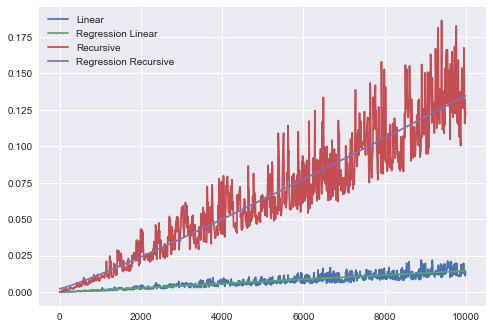

In [30]:
plt.plot(sizes, L_times, label="Linear")


c, d = np.polyfit(sizes, L_times, 1)
plt.plot(sizes, map(lambda x: c*x + d, sizes), label="Regression Linear")

plt.plot(sizes, F_times, label="Recursive")

a, b = np.polyfit(np.log(sizes)*sizes, F_times, 1)
plt.plot(sizes, map(lambda x: a*np.log(x)*x + b, sizes), label="Regression Recursive")
plt.legend()
plt.show()

## Matrix Multiplication

In [36]:
# Time splitting of matrices
rep = 1000

sizes = []
for i in xrange(0, rep):
    sizes.append(i+1)
    
split_times = []

for i in tqdm.trange(rep):
    A = np.random.randint(10, size=(i,i))
    start = time.clock()
    res = A[0:int(float(i)/2),0:int(float(i)/2)]
    split_times.append(time.clock()-start)

100%|██████████| 1000/1000 [00:09<00:00, 100.34it/s]


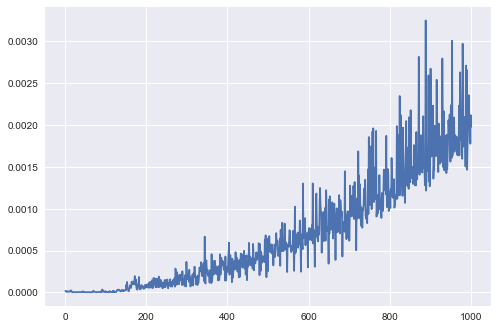

In [37]:
plt.plot(sizes,split_times)
plt.show()

In [38]:
# Time splitting of matrices
rep = 1000

sizes = []
for i in xrange(0, rep):
    sizes.append(i+1)
    
split_times = []

for i in tqdm.trange(rep):
    A = np.random.randint(10, size=(i,i))
    start = time.clock()
    res = A[0:int(float(i)/2)][0:int(float(i)/2)]
    split_times.append(time.clock()-start)

100%|██████████| 1000/1000 [00:11<00:00, 34.22it/s] 


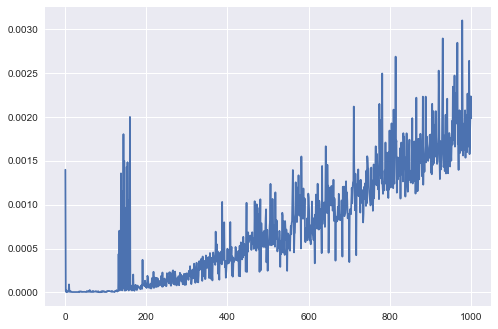

In [39]:
plt.plot(sizes,split_times)
plt.show()

We see that splitting matrices generally runs with complexity $\Theta(n^2)$.  

In [46]:
A = np.zeros((3,3))
# A[0:1][1:2] = np.array([[1., 2.] [3., 4.]])
A[0:1][0:2]

array([[ 0.,  0.,  0.]])

In [51]:
# Time recursive square multiplication versus normal
rep = 8

sizes = []
for i in xrange(0, rep):
    sizes.append(2**i)
    
norm_times = []
rec_times = []

for i in tqdm.trange(rep):
    A = np.random.randint(10, size=(sizes[i],sizes[i]))
    B = np.random.randint(10, size=(sizes[i],sizes[i]))
    start = time.clock()
    sq_mat_mult(A, B)
    norm_times.append(time.clock()-start)
    start = time.clock()
    rec_sq_mult(A,B)
    rec_times.append(time.clock()-start)


 88%|████████▊ | 7/8 [00:02<00:00,  1.52it/s]

100%|██████████| 8/8 [00:18<00:00,  5.21s/it]


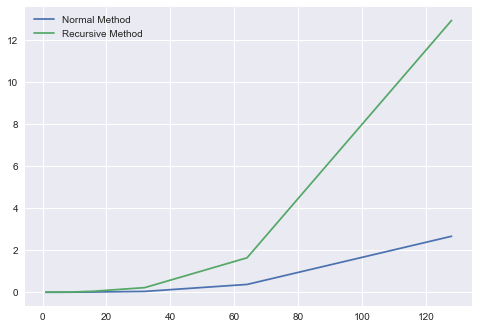

In [57]:
plt.plot(sizes, norm_times, label="Normal Method")
plt.plot(sizes, rec_times, label="Recursive Method")
plt.legend()
plt.show()

In [62]:
# Strassen Algorithm
A = np.array([[1,3],[7,5]])
B = np.array([[6,8],[4,2]])
res1 = np.dot(A,B)
res2 = strassen(A,B)
res1, res2

(array([[18, 14],
        [62, 66]]), array([[ 18.,  14.],
        [ 62.,  66.]]))

In [63]:
# Plot times of strassen vs normal matrix vs recursive
rep = 8

sizes = []
for i in xrange(0, rep):
    sizes.append(2**i)
    
norm_times = []
rec_times = []
stra_times = []

for i in tqdm.trange(rep):
    A = np.random.randint(10, size=(sizes[i],sizes[i]))
    B = np.random.randint(10, size=(sizes[i],sizes[i]))
    start = time.clock()
    sq_mat_mult(A, B)
    norm_times.append(time.clock()-start)
    start = time.clock()
    rec_sq_mult(A,B)
    rec_times.append(time.clock()-start)
    start = time.clock()
    strassen(A,B)
    stra_times.append(time.clock()-start)

100%|██████████| 8/8 [00:32<00:00,  9.40s/it]


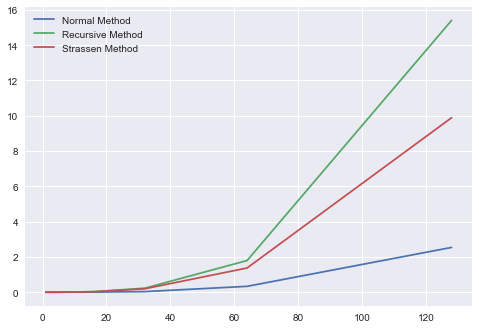

In [64]:
plt.plot(sizes, norm_times, label="Normal Method")
plt.plot(sizes, rec_times, label="Recursive Method")
plt.plot(sizes, stra_times, label="Strassen Method")
plt.legend()
plt.show()

In [71]:
# Compare large matrix multiplications - determine where strassen outperforms normal method
n = 2**9
A = np.random.randint(10, size=(n,n))
B = np.random.randint(10, size=(n,n))



In [73]:
%time strassen(A,B)


CPU times: user 7min 56s, sys: 5.16 s, total: 8min 2s
Wall time: 8min 14s


array([[ 10295.,  10458.,  10312., ...,  10144.,  10918.,  10588.],
       [  9822.,  10343.,  10292., ...,  10624.,  10637.,  10485.],
       [ 10385.,  10351.,  10318., ...,  10118.,  10937.,  10495.],
       ..., 
       [ 10173.,   9732.,   9821., ...,   9946.,  10591.,  10319.],
       [  9941.,  10579.,  10022., ...,  10655.,  10903.,  10469.],
       [ 10146.,  10411.,  10131., ...,  10237.,  10732.,   9983.]])

In [74]:
%time sq_mat_mult(A,B)

CPU times: user 2min 47s, sys: 2.32 s, total: 2min 49s
Wall time: 2min 51s


array([[ 10295.,  10458.,  10312., ...,  10144.,  10918.,  10588.],
       [  9822.,  10343.,  10292., ...,  10624.,  10637.,  10485.],
       [ 10385.,  10351.,  10318., ...,  10118.,  10937.,  10495.],
       ..., 
       [ 10173.,   9732.,   9821., ...,   9946.,  10591.,  10319.],
       [  9941.,  10579.,  10022., ...,  10655.,  10903.,  10469.],
       [ 10146.,  10411.,  10131., ...,  10237.,  10732.,   9983.]])

In [120]:
# Check Strassen2
n = 200
A = np.random.randint(10, size=(n,n))
B = np.random.randint(10, size=(n,n))
res1 = np.dot(A,B)
res2 = strassen2(A,B,64)
res1, res2


(array([[4106, 4369, 3793, ..., 4394, 4174, 4377],
        [4227, 4242, 3867, ..., 4356, 4124, 4334],
        [4311, 4179, 4007, ..., 4204, 4168, 4563],
        ..., 
        [4067, 4085, 3853, ..., 3859, 3907, 4043],
        [4190, 4019, 3829, ..., 4102, 4012, 4332],
        [3989, 4049, 3474, ..., 3992, 3845, 4203]]),
 array([[ 4106.,  4369.,  3793., ...,  4394.,  4174.,  4377.],
        [ 4227.,  4242.,  3867., ...,  4356.,  4124.,  4334.],
        [ 4311.,  4179.,  4007., ...,  4204.,  4168.,  4563.],
        ..., 
        [ 4067.,  4085.,  3853., ...,  3859.,  3907.,  4043.],
        [ 4190.,  4019.,  3829., ...,  4102.,  4012.,  4332.],
        [ 3989.,  4049.,  3474., ...,  3992.,  3845.,  4203.]]))

In [123]:
# Plot times of strassen2 vs normal matrix
rep = 12

sizes = []
for i in xrange(0, rep):
    sizes.append(2**i)
    
norm_times = []
stra_times = []

for i in tqdm.trange(rep):
    A = np.random.randint(10, size=(sizes[i],sizes[i]))
    B = np.random.randint(10, size=(sizes[i],sizes[i]))
    start = time.clock()
    sq_mat_mult(A, B)
    norm_times.append(time.clock()-start)
    start = time.clock()
    strassen2(A,B,50)
    stra_times.append(time.clock()-start)

 83%|████████▎ | 10/12 [05:33<03:10, 95.41s/it]

KeyboardInterrupt: 

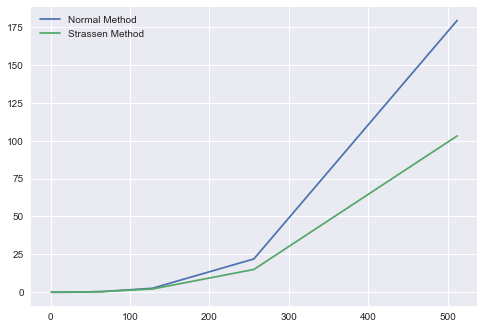

In [125]:
plt.plot(sizes[0:10], norm_times, label="Normal Method")
plt.plot(sizes[0:10], stra_times, label="Strassen Method")
plt.legend()
plt.show()

In [127]:
A = np.random.randint(10, size=(500,500))
B = np.random.randint(10, size=(500,500))
%time np.dot(A,B)

CPU times: user 234 ms, sys: 5.12 ms, total: 239 ms
Wall time: 245 ms


array([[10326,  9926, 10188, ...,  9816, 10202,  9953],
       [10422, 10425, 10297, ..., 10098, 10194, 10167],
       [10176, 10459,  9908, ...,  9984,  9998, 10664],
       ..., 
       [10599, 11019, 10494, ..., 10292, 10492, 10753],
       [10236, 10535, 10167, ...,  9868, 10104, 10279],
       [10833, 11028, 10602, ..., 10034, 10210, 10634]])

## Strassen2
As we can see in the above implementation, we have finally designed an algorithm, Strassen2, that outperforms the normal matrix multiplication method.  Further, we have extended this new algorithm to multiply any size square matrix, and have a variable leaf size input.  Let us analyze the impact of the leaf size for a matrix of size 250:

In [129]:
# Plot times of strassen2 vs leaf size
rep = 20

sizes = []
for i in xrange(0, rep):
    sizes.append(2*i + 10)
    
leaf_times = []

for i in tqdm.trange(rep):
    A = np.random.randint(10, size=(200,200))
    B = np.random.randint(10, size=(200,200))
    start = time.clock()
    strassen2(A,B,sizes[i])
    leaf_times.append(time.clock()-start)



  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:16<05:10, 16.32s/it]

 10%|█         | 2/20 [00:30<04:44, 15.81s/it]

 15%|█▌        | 3/20 [00:44<04:18, 15.21s/it]

 20%|██        | 4/20 [00:59<03:59, 14.96s/it]

 25%|██▌       | 5/20 [01:12<03:39, 14.61s/it]

 30%|███       | 6/20 [01:26<03:21, 14.37s/it]

 35%|███▌      | 7/20 [01:41<03:07, 14.46s/it]

 40%|████      | 8/20 [01:55<02:53, 14.42s/it]

 45%|████▌     | 9/20 [02:10<02:40, 14.55s/it]

 50%|█████     | 10/20 [02:23<02:21, 14.17s/it]

 55%|█████▌    | 11/20 [02:37<02:05, 13.99s/it]

 60%|██████    | 12/20 [02:52<01:53, 14.17s/it]

 65%|██████▌   | 13/20 [03:06<01:39, 14.25s/it]

 70%|███████   | 14/20 [03:22<01:27, 14.66s/it]

 75%|███████▌  | 15/20 [03:37<01:13, 14.77s/it]

 80%|████████  | 16/20 [03:52<00:59, 14.90s/it]

 85%|████████▌ | 17/20 [04:06<00:44, 14.79s/it]

 90%|█████████ | 18/20 [04:21<00:29, 14.87s/it]

 95%|█████████▌| 19/20 [04:36<00:14, 14.80s/it]

100%|██████████| 20/20 [04:51<00:00

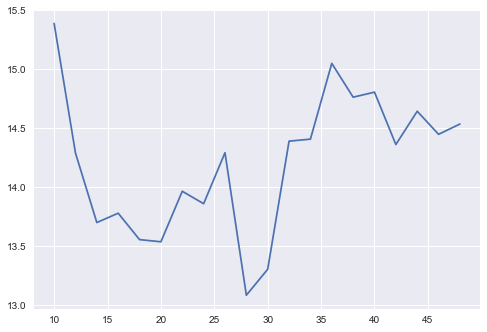

In [130]:
plt.plot(sizes, leaf_times)
plt.show()